In [2]:
import pandas as pd
import IPython.display as dis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation

# import time
import pathlib as pl
from analysis import *

date = "21may2022"

# Find all CSV files for this dataset
for file in pl.Path.cwd().glob(date + "//*.csv"):
    print(file)

scan_names = [str(file) for file in pl.Path.cwd().glob(date + "//*.csv")]
scan_name_front = date + "\machined_sample_1_polarization_analysis__1125.csv"
scan_name_rear = date + "\machined_sample_1_rear_polarization_analysis__1600.csv"

columns = [
    "Power - Mean [W]",
    "G3 X Translation",
    "G3 Y Translation",
    "Polarizer [deg]",
    "Analyzer [deg]",
    "Waveplate [deg]",
]

C:\Users\Dima's group\Documents\Python Scripts\nir_images\tim_measurements\21may2022\machined_sample_1_polarization_analysis__1125.csv
C:\Users\Dima's group\Documents\Python Scripts\nir_images\tim_measurements\21may2022\machined_sample_1_rear_polarization_analysis__1600.csv


In [3]:
print(type(m1))

NameError: name 'm1' is not defined

# Stokes Parameters Measurements

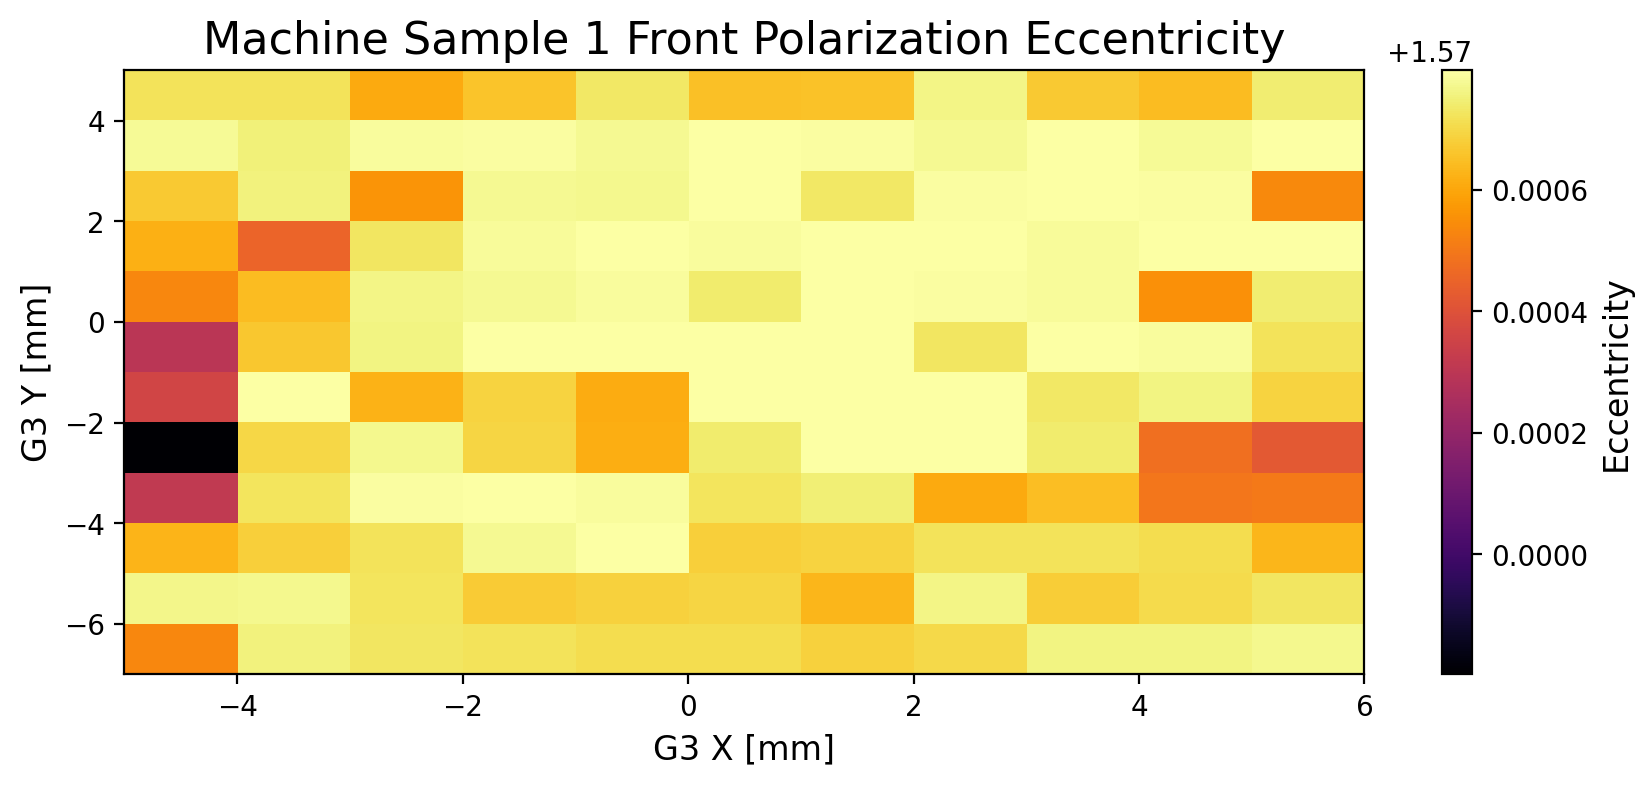

In [3]:
# reads csv with pandas and stores everything in scan_df

scan_df_front = pd.read_csv(scan_name_front, usecols=columns)

scan_df_rear = pd.read_csv(scan_name_rear, usecols=columns)
# stores G3 (sample) x-axis positions
x_values = np.unique(scan_df_front["G3 X Translation"])
# stores G3 (sample) y-axis positions
y_values = np.unique(scan_df_front["G3 Y Translation"])
# finds values of the polarizer and analyzers
polarizer_front_angle = np.unique(scan_df_front["Polarizer [deg]"])
analyzer_front_angle = np.unique(scan_df_front["Analyzer [deg]"])
waveplate_front_angle = np.unique(scan_df_front["Waveplate [deg]"])

polarizer_rear_angle = np.unique(scan_df_rear["Polarizer [deg]"])
analyzer_rear_angle = np.unique(scan_df_rear["Analyzer [deg]"])
waveplate_rear_angle = np.unique(scan_df_rear["Waveplate [deg]"])

eccentricity = []
aligned_intensity = []

for x in x_values:
    for y in y_values:
        # measurements
        m1 = get_measurements(scan_df_front, 174, 5, x, y, 0.01)
        m2 = get_measurements(scan_df_front, 84, 95, x, y, 0.01)
        m3 = get_measurements(scan_df_front, 129, 50, x, y, 0.01)
        m4 = get_measurements(scan_df_front, 174, 50, x, y, 0.01)

        # stokes parameters: https://pol3he.sites.wm.edu/wp-content/uploads/sites/50/2020/01/measuring-Stokes-parameters.pdf
        s0 = m1 + m2  # I
        s1 = (m1 - m2) / s0  # Q
        s2 = (2 * m3 - s0) / s0  # U
        s3 = (s0 - 2 * m4) / s0  # V

        # Ip**2 = Q**2 + U**2 + V**2
        # https://en.wikipedia.org/wiki/Stokes_parameters#Properties
        polarization_intensity = np.sqrt(s1**2 + s2**2 + s3**2)
        # |L|**2 = Q**2 + U**2
        complex_intensity = np.sqrt(s1**2 + s2**2)

        # find eccentricity
        a = np.sqrt(1 / 2 * (polarization_intensity + complex_intensity))
        b = np.sqrt(1 / 2 * (polarization_intensity - complex_intensity))
        e = np.sqrt(1 - ((b**2) / (a**2)))
        #         print("m1: {}, m2: {}, m3: {}, m4: {},\n    Ip: {}, L: {}, a: {}, b: {}, e: {}".format(
        #             m1, m2, m3, m4, polarization_intensity, complex_intensity, a, b, e))

        eccentricity.append(e)
        aligned_intensity.append(m1)

eccentric = np.reshape(eccentricity, [26, 16])
eccentric = np.transpose(eccentric)


fig = plt.figure(figsize=[10, 4], dpi=200)

power_map = plt.pcolormesh(
    np.negative(x_values[8:-7]) * 0.25e-3,
    np.negative(y_values[1:-3]) * 0.05e-3,
    (np.arccos(1 - eccentric[3:-1, 7:-8])),
    cmap="inferno",
    shading="nearest",
)
plt.title("Machine Sample 1 Front Polarization Eccentricity", size=16)
plt.ylabel("G3 Y [mm]", size=12)
plt.xlabel("G3 X [mm]", size=12)
plt.colorbar(power_map).ax.set_ylabel("Eccentricity", size=12)
# plt.savefig("{}/machined_sample_1_front_polarization_eccentricity.png".format("figures"))
plt.show()

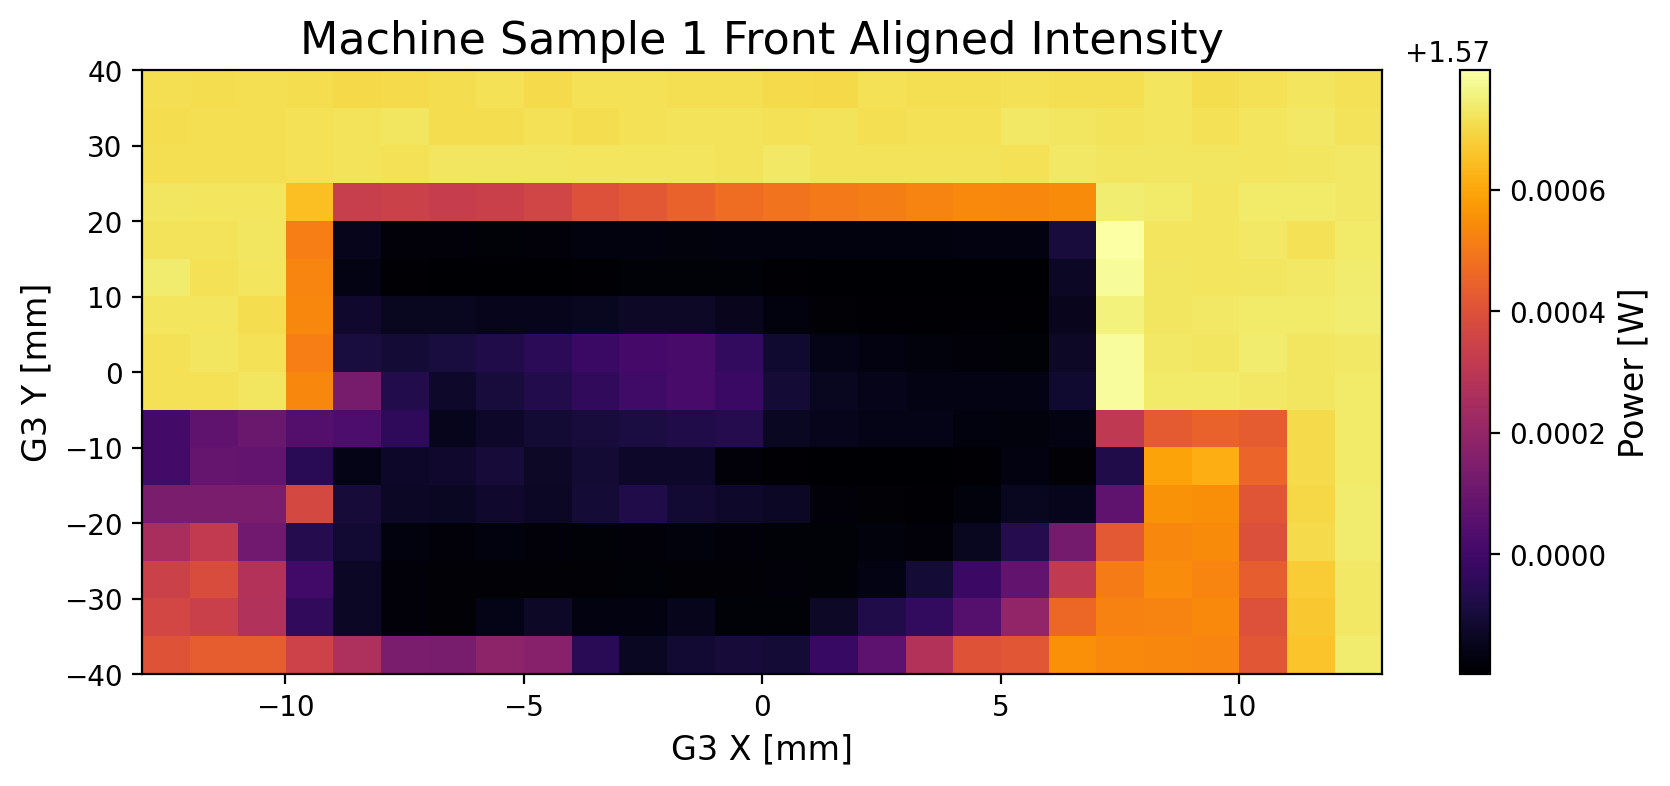

In [4]:
fig = plt.figure(figsize=[10, 4], dpi=200)
aligned_intensity = np.array(aligned_intensity).reshape(26, 16)
plt.pcolormesh(
    np.negative(x_values) * 0.25e-3,
    np.negative(y_values) * 0.25e-3,
    np.transpose(aligned_intensity),
    shading="nearest",
    cmap="inferno",
)
plt.title("Machine Sample 1 Front Aligned Intensity", size=16)
plt.ylabel("G3 Y [mm]", size=12)
plt.xlabel("G3 X [mm]", size=12)
plt.colorbar(power_map).ax.set_ylabel("Power [W]", size=12)
plt.savefig("{}/machined_sample_1_front_intensity.png".format("figures"))
plt.show()